# **PERDIDOS EN EL ESPACIO**

Este proyecto consiste en localizar el planeta en el que se encuentra la nave.

## Importaciones necesarias

Primeramente, comenzamos con la importación de las distintas librerías necesarias para la realización del ejercicio. Las librerías importadas son las siguientes:</br>
- Panda: Librería dedicada a la manipulación y análisis de datos.</br>
- Numpy: Librería dedicada a funciones matemáticas, también estadísticas siendo fundamentales para la resolución del ejercicio.</br>
- Matplotlib: Librería capaz de realizar gráficos, diagramas, entre otros, es decir, es una biblioteca de visualización de datos. Para poder funcionar correctamente es necesario Numpy ya que lo utiliza para realizar distintos cálculos antes de realizar el grafico que se imprimirá. Se importa junto al módulo pyplot, que proporciona una interfaz simple para la creación y visualización de gráficos y datos.</br>
- Plotly: Librería similar a Matplotlib, cumple la misma función. Sin embargo, estos gráficos que crean son interactivos. Se importa dentro de ella express, añadiendo la posibilidad de crear gráficos de área, puntos, entre otros, necesarios para la realización de las rectas de regresión lineal.</br>

In [143]:
# Importación de las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
print("Setup complete")

Setup complete


## Primera toma de contacto con los planetas

### Creación de los planetas

Los planetas tienen características similares, mismas variables, pero con distintos datos. Por ello, sería óptimo la creación de clases poniendo como variable la gravedad y nombre de cada uno de ellos. Para la definición de los planetas, se ha realizado un diccionario introduciendo como clave el nombre del planeta y valor su gravedad. Finalmente mediante un bucle se han introducido en una lista todos los planetas. </br>

In [144]:
class Planeta:
    def __init__(self, nombre, g):
        self.nombre = nombre
        self.g = g

planetas_dict = {'Tierra': 9.8 , 'Marte': 3.7, 'Jupiter': 24.8, 'Saturno': 9.0, 'Urano': 8.7, 'Neptuno': 11.0} # Posibles planetas
planetas = [] # Planetas

for nombre, g in planetas_dict.items(): # Carga de planetas
    planetas.append(Planeta(nombre, g))


print("Planetas cargados")

Planetas cargados


Con los planetas ya generados se pasaría a la fase de la experimentación y a través de los ejercicios propuestos se descartarían algunos planetas. Aunque primero definimos las operaciones que se utilizarán para el cálculo del error y la gravedad mediante funciones.</br>

### Operaciones y búsqueda del planeta

#### Cálculo de la gravedad y el error

El enunciado proporciona la fórmula necesaria y además especifica el error de la longitud y tiempo.</br>

In [145]:
# Operación de la simulación
def simulacion(longitud, tiempo):
    # CALCULO DE LA GRAVEDAD
    g_calculado = (2 * longitud) / (tiempo**2)

    # CALCULO DEL ERROR
    L_error = 0.01 # VALOR YA DADO EN EL ENUNCIADO
    t_error = 0.01 # VALOR YA DADO EN EL ENUNCIADO
    dg_dL = 2 / tiempo**2 #Derivada parcial g respecto l
    dg_dt = -4 * longitud / tiempo**3 #Derivada parcial g respecto t

    g_error = np.sqrt((dg_dL * L_error)**2 + (dg_dt * t_error)**2)
    return g_calculado, g_error

Definida las distintas operaciones para el cálculo de la gravedad y el error. Nos hace falta designar una función que permita mediante ese resultado analizar en que planetas estará y descartar algunos. Para ello, se establece una función que devuelve una lista tratada con un bucle que mediante un condicional certifique si el valor de las gravedades de todos los planetas se encuentra entre la nueva gravedad calculada mas y menos su error. </br>

#### Establecimiento de los posibles planetas

In [146]:
def planeta_esperado(g_calculado, g_error):
    for planeta in planetas:
        if g_calculado - g_error <= planeta.g and planeta.g <= g_calculado + g_error:
            return planeta
    return None


## Resolución de los ejercicios propuestos

In [147]:
experimento_a = simulacion(1, 0.46)
print("Experimento A")
print(f"- Gravedad calculada: {round(experimento_a[0],3)} \n- Error calculado: {round(experimento_a[1],3)} ")
experimento_b = simulacion(2, 0.66)
print('Experimento B')
print(f"- Gravedad calculada: {round(experimento_b[0],3)} \n- Error calculado: {round(experimento_b[1],3)} ")

Experimento A
- Gravedad calculada: 9.452 
- Error calculado: 0.422 
Experimento B
- Gravedad calculada: 9.183 
- Error calculado: 0.282 


In [148]:
experimento_a = planeta_esperado(experimento_a[0], experimento_a[1])

experimento_b = planeta_esperado(experimento_b[0], experimento_b[1])

if experimento_a is None or experimento_b is None:
    print("No se pudo determinar el planeta en el que se encuentra la nave.")
else:
    if experimento_a == experimento_b:
        print("El planeta en el que se encuentra la nave se trata de ", experimento_a.nombre)
    else:
        planetas_probables = []
        planetas_probables.append(experimento_a.nombre)
        planetas_probables.append(experimento_b.nombre)
        print("El planeta se puede encontrar en alguno de los siguientes planetas: ")
        for planeta in planetas_probables:
            print('  -', planeta)

El planeta se puede encontrar en alguno de los siguientes planetas: 
  - Tierra
  - Saturno


A continuación, la lista se nos ha reducido a 2 posibles planetas por lo tanto comencemos dataset.

## Creación del DataSet

El objetivo será realizar un dataset con distintos valores de longitud y tiempo y a partir de ahí calcular su error y gravedad a través de la anterior función. Tras ello, ejecutar el método anterior para averiguar en todos los posibles planetas y decidir finalmente en cual estará.</br>

### Creacion de distintos instantes de tiempo y longitudes

Se ha realizado una gráfica, SE HA SUPUESTO que la gravedad es lineal, no cuadrática que es como sería en la realidad. Para ello, se ha creado un DataFrame con los valores dados por los problemas propuestos. Mediante el uso de numpy, se ha hallado los distintos coeficientes de la recta: y=mx+n. Tras ello mediante plotly se ha creado primero la gráfica con eje x: tiempo; eje y= longitud. Mediante la función add_trace se añade la recta.</br>

In [149]:
df_recta = pd.DataFrame({'tiempo': [0.46, 0.66], 'longitud': [1,2]})
coeficientes = np.polyfit(df_recta['tiempo'], df_recta['longitud'], 1) # polyfit(x, y, degree) sirve para calcular los coeficientes de la ecuación de la recta (y = mx + b)
m = coeficientes[0]
n = coeficientes[1]
fig = px.scatter(df_recta, x='tiempo', y='longitud') # Crear una gráfica de dispersión
fig.add_trace(px.line(x=df_recta['tiempo'], y=m*df_recta['tiempo'] + n).data[0]) # Añadir la recta a la gráfica de dispersión
fig.show()

Esta gráfica ha sido realizada para no coger datos atípicos como podría ser: L = 30; t = 0'3. A continuación, se seleccionarán algunos de los infinitos puntos que contiene la recta y se obtendrán valores para la longitud y tiempo.</br>

Para poder realizar lo anteriormente mencionado, mediante la opción de linspace de numpy, estableciendo el principio, el tope y el número de puntos que quieres obtener, se generan valores equidistantes entre el principio y el tope. Para calcular la y, se escribe la ecuación de la recta. Mediante un bucle se van añadiendo esos valores a una lista que serán añadidos al dataframe creado y redondeados a la milésima.</br>

In [150]:
# PENDIENTE
m =(df_recta['longitud'][1] - df_recta['longitud'][0] )/ (df_recta['tiempo'][1] - df_recta['tiempo'][0])
print(m)

# ORDENADA EN EL ORIGEN
n = df_recta['longitud'][0] - m * df_recta['tiempo'][0]

# CALCULO DE TIEMPOS/LONGITUDES
x = np.linspace(0.46, 0.66, 250)
y = m*x + n

data = []
for i in range(len(x)):
    data.append({'tiempo': x[i], 'longitud': y[i]})


df_recta = pd.DataFrame(data)
df_recta = df_recta.round(3)
df_recta.head(3)

5.0


,tiempo,longitud
0,0.460,1.000
1,0.461,1.004
2,0.462,1.008


Recalcamos que todos los valores de las columnas deben de ser tipo float, debido a que se tratan de números decimales.</br>

In [151]:
df_recta.astype(float)
df_recta.dtypes

tiempo      float64
longitud    float64
dtype: object

**COMPROBACIÓN PUNTOS HALLADOS EN LA RECTA DE MANERA GRÁFICA**

En este caso, se realizará una gráfica con todos los datos del dataframe y serán colocado en el gráfico anterior para comprobar que son puntos de la recta. En este caso, usaremos la libreria Matplotlib.

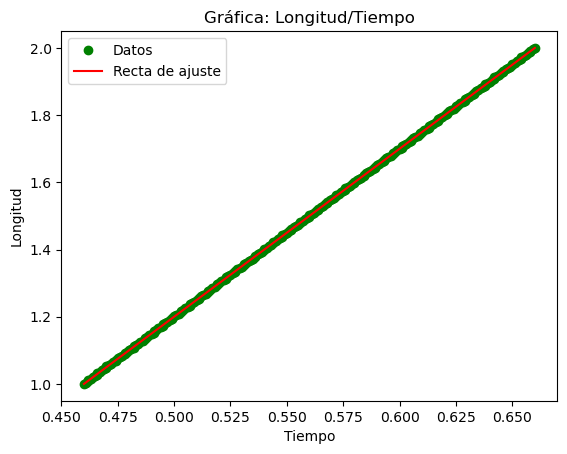

In [152]:

# CREACIÓN DE LA GRÁFICA
plt.plot(df_recta['tiempo'], df_recta['longitud'], 'o', label='Datos', color = 'green') # plot(x, y, format): format siendo el color y el tipo de línea

# CREACIÓN DE LA RECTA
plt.plot(df_recta['tiempo'], m * df_recta['tiempo'] + n, '-', label='Recta de ajuste', color='red')

# REALIZACIÓN DE LOS COMPLEMENTOS DE LA GRÁFICA: Título, nombres de los ejes y leyenda
plt.title('Gráfica: Longitud/Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Longitud')
plt.legend()


plt.show()

### Cálculo de la gravedad y el error

Con los tiempos y longitudes ya podemos empezar a determinar el error y la gravedad. Para ello, crearemos dos listas en las cuales mediante un bucle se irán añadiendo los cálculos del error y gravedad a sus correspondientes listas. Tras ello, serán añadidas al dataframe creado anteriormente. </br>

In [153]:
g_calculado = []
g_error = []
for i in range(len(df_recta)):
    g = simulacion(df_recta['longitud'][i], df_recta['tiempo'][i])
    g_calculado.append(g[0])
    g_error.append(g[1])
df_recta['g_calculado'] = g_calculado
df_recta['g_error'] = g_error

A continuacuón, imprimimos las primeras 5 columnas del dataframe para verlo y posteriormente crearemos un csv para guardarlo.</br>

In [154]:
df_recta.head(5)

,tiempo,longitud,g_calculado,g_error
0,0.460,1.000,9.451796,0.421677
1,0.461,1.004,9.448478,0.420576
2,0.462,1.008,9.445100,0.419478
3,0.462,1.012,9.482581,0.421060
4,0.463,1.016,9.478983,0.419954


In [155]:
df_recta.to_csv('data/data_no_faker.csv') # CREACIÓN DE UN CSV

### Posible planeta

Tras todo lo realizado, ya se han obtenido todos los datos necesarios para calcular la gravedad y poder finalmente usar la función 'planetas_esperado' para obtener el planeta. Pero antes de eso, se realizará una copia del dataframe anterior para no modificarlo.</br>

In [156]:
df_recta_1 = df_recta.copy()

Mediante un bucle ejecutamos la función definida al principio para averiguar el planeta en el que se encuentre. En el caso en el que no sea de ningún planeta, se devolverá un valor vacío que posteriormente será eliminado.</br>

In [157]:
planeta_pos = []
for i in range(len(df_recta_1)):
    planeta = planeta_esperado(df_recta_1['g_calculado'][i], df_recta_1['g_error'][i])
    if planeta is not None:
        planeta_pos.append(planeta.nombre)
    else:
        planeta_pos.append('')
df_recta_1['planeta'] = planeta_pos
df_recta_1['planeta'] = df_recta_1['planeta'].astype(str)



In [158]:
df_recta_1.head(100)

,tiempo,longitud,g_calculado,g_error,planeta
0,0.460,1.000,9.451796,0.421677,Tierra
1,0.461,1.004,9.448478,0.420576,Tierra
2,0.462,1.008,9.445100,0.419478,Tierra
3,0.462,1.012,9.482581,0.421060,Tierra
4,0.463,1.016,9.478983,0.419954,Tierra
...,...,...,...,...,...
95,0.536,1.382,9.620740,0.365670,Tierra
96,0.537,1.386,9.612684,0.364670,Tierra
97,0.538,1.390,9.604621,0.363674,Tierra
98,0.539,1.394,9.596552,0.362681,Tierra


In [159]:
df_recta_1.describe()

,tiempo,longitud,g_calculado,g_error
count,250.000000,250.000000,250.000000,250.000000
mean,0.560000,1.500000,9.486044,0.349169
std,0.058085,0.290454,0.125573,0.041153
min,0.460000,1.000000,9.182736,0.282027
25%,0.510250,1.250000,9.405672,0.313252
50%,0.560000,1.500000,9.526114,0.347556
75%,0.609750,1.750000,9.592216,0.384492
max,0.660000,2.000000,9.630199,0.421677


Finalmente, con el dataframe creado ejecutamos el siguiente comando para eliminar los valores que estén 'vacios' en la columna planeta.</br>

In [160]:
df_recta_1['planeta'].replace('', np.nan, inplace=True) # Reemplazar los valores vacíos por NaN
df_recta_1.isnull() # Eliminar las filas con valores NaN

,tiempo,longitud,g_calculado,g_error,planeta
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
245,False,False,False,False,False
246,False,False,False,False,False
247,False,False,False,False,False
248,False,False,False,False,False


Comprobamos el tipo de cada columna para ver si son correctos.</br>

In [161]:
df_recta_1.dtypes

tiempo         float64
longitud       float64
g_calculado    float64
g_error        float64
planeta         object
dtype: object

In [162]:
df_recta_1['planeta'].value_counts()


Tierra     164
Saturno     30
Name: planeta, dtype: int64

Contamos el número de veces que se ha repetido la misma palabra en la columna de 'planeta'. Finalmente nos sale como resultado que la Tierra es el que mayor número de veces que se ha repetido la misma palabra en la columna, por consiguiente es el planeta en el que se encuentran.</br>

Seguidamente se podrá observar un gráfico realizado gracias a la libreria Matplotib sobre las veces que se repiten los planetas.</br>

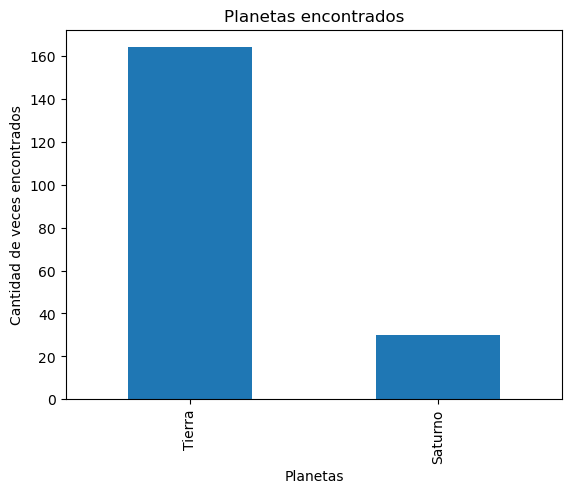

In [163]:
df_recta_1['planeta'].value_counts().plot(kind='bar')

plt.title('Planetas encontrados')
plt.xlabel('Planetas')
plt.ylabel('Cantidad de veces encontrados')

plt.show()

### Cálculo de porcentajes

In [164]:
# Calcular la frecuencia absoluta
freq_abs = df_recta_1['planeta'].value_counts()

# Calcular la frecuencia relativa
freq_rel = freq_abs / len(df_recta_1['planeta'])

# Calcular los porcentajes (opcional)
porcentajes = freq_rel * 100
for i in range(len(porcentajes)):
    print(f'{freq_abs.index[i]}: {round(porcentajes[i], 2)}%')


Tierra: 65.6%
Saturno: 12.0%


## Conclusión

Tras todos los cálculos realizados, llegamos a la conclusión de que se encuentra en la Tierra. </br>